In [1]:
import pandas as pd


In [2]:
accidents = '/Users/alfio/Teaching/2018-19/generali/torino/pygen/data/trafficsample.csv'
A = pd.read_csv(accidents, low_memory=False, index_col=0)

In [3]:
S = A[['Longitude', 'Latitude', 'Number_of_Casualties']]

In [4]:
S.head()

,Longitude,Latitude,Number_of_Casualties
175309,-0.588005,51.582399,1
53367,1.276633,52.633805,1
85873,-2.717854,53.472632,3
359233,-0.852115,51.646155,1
340672,-0.051837,51.550802,1


In [5]:
S.corr()

,Longitude,Latitude,Number_of_Casualties
Longitude,1.000000,-0.458748,-0.051885
Latitude,-0.458748,1.000000,0.038463
Number_of_Casualties,-0.051885,0.038463,1.000000


In [7]:
import matplotlib.pyplot as plt

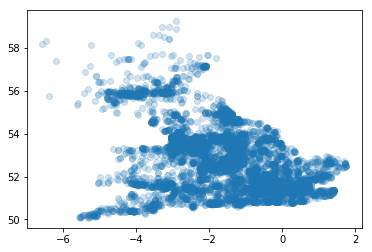

In [8]:
fig, ax = plt.subplots()
ax.scatter(A['Longitude'], A['Latitude'], alpha=0.2)
plt.show()

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
S.head()

,Longitude,Latitude,Number_of_Casualties
175309,-0.588005,51.582399,1
53367,1.276633,52.633805,1
85873,-2.717854,53.472632,3
359233,-0.852115,51.646155,1
340672,-0.051837,51.550802,1


In [32]:
scaler = StandardScaler()
pca = PCA(n_components=2)

In [36]:
transformations = [scaler, pca]
current_data = S
for method in transformations:
    current_data = method.fit_transform(current_data)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
current_data

array([[-0.948909  , -0.29133799],
       [-1.37974356, -0.26346177],
       [ 1.38884003,  1.88370606],
       ...,
       [-1.26630327,  0.99006856],
       [-1.24242669, -0.25561351],
       [ 0.67038216,  4.51344885]])

In [30]:
T

array([[ 0.57845308, -0.69515855, -0.41897798],
       [ 1.92523231,  0.03957775, -0.41897798],
       [-0.95988113,  0.62576106,  2.04995531],
       ...,
       [ 1.18069583, -0.78386589,  0.81548866],
       [ 0.93524479, -0.75691057, -0.41897798],
       [-1.55529912, -1.47620031,  4.51888859]])

In [33]:
pca.fit(T)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
K = pca.transform(T)

In [ ]:
K.shape

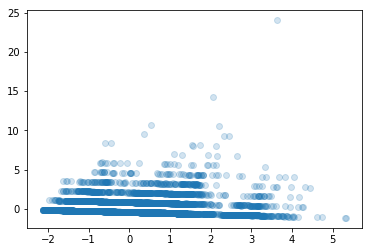

In [35]:
fig, ax = plt.subplots()
ax.scatter(K[:,0], K[:,1], alpha=0.2)
plt.show()

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [39]:
km = KMeans(n_clusters=8)
hc = AgglomerativeClustering(n_clusters=8)

In [40]:
km.fit(K)
hc.fit(K)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func='deprecated')

In [41]:
k_clusters = km.predict(K)
h_clusters = hc.labels_

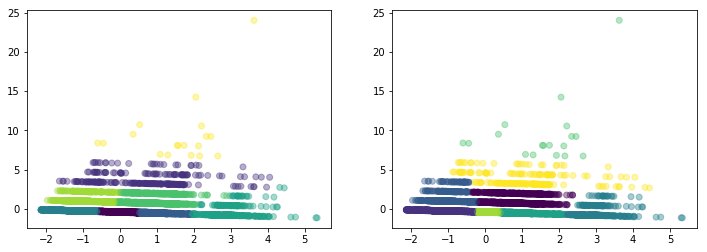

In [43]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].scatter(K[:,0], K[:,1], alpha=0.4, c=k_clusters)
ax[1].scatter(K[:,0], K[:,1], alpha=0.4, c=h_clusters)
plt.show()